In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('merged_data1.csv',encoding = 'utf8',sep=';')
X = df[['M_C', 'M_A', 'IS_SYM', 'P', 'T']].values
y = df[['Rho']].values

In [3]:
'''Przygotowanie danych - podzielenie danych na zbiór trenujacy i testowy'''

X_train, X_test, y_train, y_test = train_test_split(
X,y,test_size = 0.4, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print('Test shapes')
print(X_test.shape)
print(y_test.shape)

(1912, 5)
(1912, 1)
Test shapes
(1275, 5)
(1275, 1)


In [4]:
# Skalowanie cech dla lepszej wydajności modelu EN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [6]:
# Utwórz model K-NN
k_neighbors = 2  # Wybierz liczbę sąsiadów (k)
knn_model = KNeighborsRegressor(n_neighbors=k_neighbors)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

knn_model.fit(X_train, y_train)

In [7]:
y_test_knn = knn_model.predict(X_test)
y_train_knn =knn_model.predict(X_train)

In [8]:
### Metryki dla zbioru testowego
r2 = r2_score(y_test, y_test_knn)
print(f"Współczynnik determinacji R^2: {r2}")
mse = mean_squared_error(y_test, y_test_knn)
print(f"Błąd średniokwadratowy MSE: {mse}")

Współczynnik determinacji R^2: 0.9540880741286245
Błąd średniokwadratowy MSE: 877.2904428712395


In [9]:
###MEtryki dla zbioru treningowego
r2_train = r2_score(y_train, y_train_knn)
print(f"Współczynnik determinacji R^2: {r2_train}")
mse_train = mean_squared_error(y_train, y_train_knn)
print(f"Błąd średniokwadratowy MSE: {mse_train}")

Współczynnik determinacji R^2: 0.9817092315299482
Błąd średniokwadratowy MSE: 358.9979589101785


## Walidacja Krzyżowa

In [10]:
# Przeprowadź walidację krzyżową z 5 foldami i oblicz R^2 jakość modelu
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=25, scoring='r2')
# Oblicz średnią wartość R^2 po wszystkich foldach
mean_r2 = cv_scores.mean()
print("Średni R^2 po walidacji krzyżowej:", mean_r2)

Średni R^2 po walidacji krzyżowej: 0.9456581054877343


# Wykresy R2

In [11]:
test_predictions_knn = pd.Series(y_test_knn.reshape(1275,))
pred_df = pd.DataFrame(y_test,columns = ['Test TRUE Y'])
pred_df = pd.concat([pred_df,test_predictions_knn],axis = 1)
pred_df.columns = ['Test true y', 'Pred']

In [12]:
train_predictions_knn = pd.Series(y_train_knn.reshape(1912,))
train_df = pd.DataFrame(y_train,columns = ['Test TRUE Y'])
train_df = pd.concat([train_df,train_predictions_knn],axis = 1)
train_df.columns = ['Test true y', 'Pred']

<Axes: xlabel='Test true y', ylabel='Pred'>

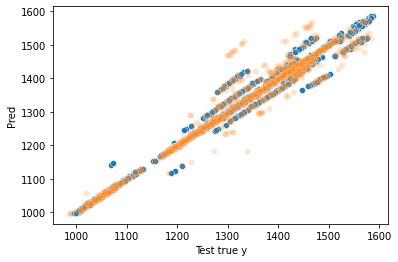

In [13]:
sns.scatterplot(x = 'Test true y', y = 'Pred', data = train_df)
sns.scatterplot(x = 'Test true y', y = 'Pred', data = pred_df, alpha = 0.2)

In [14]:
train_df

,Test true y,Pred
0,1484.17,1486.480
1,1251.80,1249.800
2,1414.30,1414.750
3,1434.54,1450.935
4,1453.62,1453.530
...,...,...
1907,1325.50,1413.995
1908,1023.86,1027.580
1909,1214.92,1216.770
1910,1513.35,1512.930


In [15]:
pred_df

,Test true y,Pred
0,1310.90,1396.490
1,1266.10,1263.950
2,1492.27,1494.605
3,1190.69,1190.640
4,1061.93,1066.075
...,...,...
1270,1379.05,1424.095
1271,1057.40,1057.450
1272,1421.72,1418.430
1273,1317.90,1350.235


In [16]:
import os
directory_path = 'D:/PhD/ML/KNN/Ks'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
# train_df.to_csv(os.path.join(directory_path, 'train_set_KNN.csv'), sep=';', encoding='utf-8')
# pred_df.to_csv(os.path.join(directory_path, 'test_set_KNN.csv'), sep=';', encoding='utf-8') 

In [17]:
def predictions3(MC,MA,SYM,P,T):
    res = []
    for j in T:
        for i in P:
            new_geom = [[MC,MA,SYM,i,j]]
            new_geom = scaler.transform(new_geom)
            res.append(knn_model.predict(new_geom))
            #print(model.predict(new_geom))
    return res

In [42]:
nazwa = 'C4C1Pyr_NTF2'
Mcat = 127.137
Man = 280.146

P = [0.1,5,10,20,30,40,50,60,70,80,90,95]
T = [283.15,293.15,303.15,313.15,323.15,333.15,343.15]
result = predictions3(Mcat,Man,0,P,T);

In [43]:
res_flat = np.array(result).flatten()  # przekształcenie do jednowymiarowej tablicy numpy
res_numerical = [val.item() for val in res_flat]  # wyodrębnienie wartości liczbowych
# for i in res_numerical:
#     print(i);

In [44]:
directory_path = 'D:/PhD/ML/KNN/Ks/'
directory_path + nazwa 
tablica_danych = np.array(res_numerical).reshape(len(T), len(P))
dane = pd.DataFrame(tablica_danych)
dane = dane.T
dane.to_excel(directory_path+nazwa+'_Rho_Ks_KNN.xlsx', index=False)
